# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 20 ноября 2019

Мягкий дедлайн: 23:59MSK 7 декабря 2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 10 декабря 2019.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [3]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Будем считать коэффициенты близкими к нулю, если они по модулю не превосходят $eps=10^{-3}$

In [4]:
eps = 1e-3

alpha_coefs_arr = np.logspace(-3, 3, 100)
not_zero_coefs_amount_list_lasso = []
not_zero_coefs_amount_list_ridge = []

for alpha_coef in alpha_coefs_arr:
    lasso_model = Lasso(alpha=alpha_coef)
    lasso_model.fit(X_train, y_train)
    lasso_coefs = lasso_model.coef_
    not_zero_coefs_amount = np.sum(abs(lasso_coefs) > eps)
    not_zero_coefs_amount_list_lasso.append(not_zero_coefs_amount)
    
    ridge_model = Ridge(alpha=alpha_coef)
    ridge_model.fit(X_train, y_train)
    ridge_coefs = ridge_model.coef_
    not_zero_coefs_amount = np.sum(abs(ridge_coefs) > eps)
    not_zero_coefs_amount_list_ridge.append(not_zero_coefs_amount)

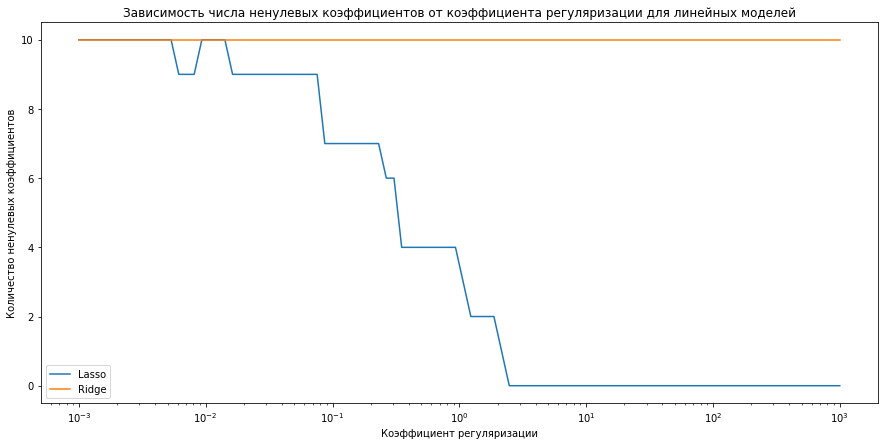

In [5]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=alpha_coefs_arr, y=not_zero_coefs_amount_list_lasso)
sns.lineplot(x=alpha_coefs_arr, y=not_zero_coefs_amount_list_ridge)

plt.title('Зависимость числа ненулевых коэффициентов от коэффициента регуляризации для линейных моделей')
plt.legend(['Lasso', 'Ridge'])
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Количество ненулевых коэффициентов')
plt.semilogx()
plt.show()

Этого и стоило ожидать, так как линейная регрессия с $L_1$-регуляризацией имеет свойство исключать неинформативные признаки (то есть занулять веса, соответствующие таким признакам). Это было доказано на лекциях.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [6]:
ridge_model.fit(X_train, y_train)
predictions_ridge = ridge_model.predict(X_test)

In [7]:
print(f'RMSE score: {np.sqrt(mean_squared_error(y_test, predictions_ridge)):.4f}')
print(f'MAE score: {mean_absolute_error(y_test, predictions_ridge):.4f}')      
print(f'R2 score: {r2_score(y_test, predictions_ridge):.4f}')     

RMSE score: 72.8037
MAE score: 59.9321
R2 score: 0.0019


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [8]:
from sklearn.model_selection import GridSearchCV, KFold
import sklearn

metrics_list = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

n_folds = 5
kfold = KFold(n_folds)
grid_search_results_list = []
grid_search_best_results_list = []
param_grid = {'alpha': np.logspace(-3, 3, 100)}

for metric in metrics_list:
    grid_search = GridSearchCV(ridge_model, param_grid=param_grid,
                               scoring=metric, cv=kfold)
    grid_search.fit(X_train, y_train)
    grid_search.cv_results_['metric'] = metric
    grid_search_results_list.append(grid_search.cv_results_)
    grid_search_best_results_list.append(grid_search.best_params_)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


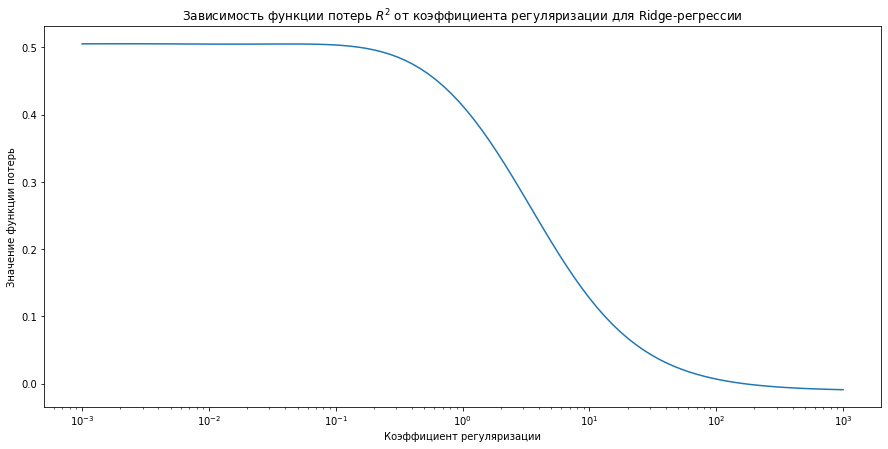

In [9]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=alpha_coefs_arr, y=grid_search_results_list[2]['mean_test_score'])


plt.title('Зависимость функции потерь $R^2$ от коэффициента регуляризации для Ridge-регрессии')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Значение функции потерь')
plt.semilogx()
plt.show()

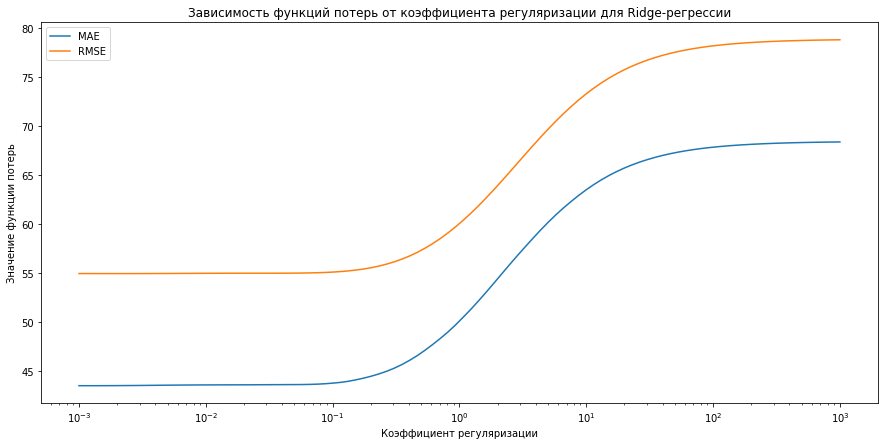

In [10]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=alpha_coefs_arr, y=-grid_search_results_list[1]['mean_test_score'])
sns.lineplot(x=alpha_coefs_arr, y=np.sqrt(-grid_search_results_list[0]['mean_test_score']))


plt.title('Зависимость функций потерь от коэффициента регуляризации для Ridge-регрессии')
plt.legend(['MAE', 'RMSE'])
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Значение функции потерь')
plt.semilogx()
plt.show()

Обучим 3 модели Ridge-регрессии с лучшими коэффициентами регуляризации для каждой из метрик:

In [11]:
preds_list = []

for best_coef in grid_search_best_results_list:
    best_coef = best_coef['alpha']
    ridge_model = Ridge(alpha=best_coef)
    ridge_model.fit(X_train, y_train)
    preds = ridge_model.predict(X_test)
    preds_list.append(preds)

In [12]:
print(f'RMSE score: {np.sqrt(mean_squared_error(y_test, preds_list[0])):.4f}')
print(f'MAE score: {mean_absolute_error(y_test, preds_list[1]):.4f}')      
print(f'R2 score: {r2_score(y_test, preds_list[2]):.4f}')     

RMSE score: 55.8211
MAE score: 47.1444
R2 score: 0.4133


Напомним предыдущие результаты:

RMSE score: 72.8037

MAE score: 59.9321

R2 score: 0.0019

Вывод: подбор параметра регуляризации позволил получить значительно лучшие результаты.

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Чтобы гистограмма была репрезентативной было решено использовать алгоритм валидации "Leave One Out".

In [13]:
from sklearn.model_selection import cross_val_predict

cross_val_pred = cross_val_predict(ridge_model, X_train, y_train, cv=KFold(y_train.shape[0]))

In [14]:
mse_oof_list = []
for _, tst_idx in KFold(y_train.shape[0]).split(X_train, y_train):
    mse_oof_list.append(mean_squared_error(y_train[tst_idx], cross_val_pred[tst_idx]))

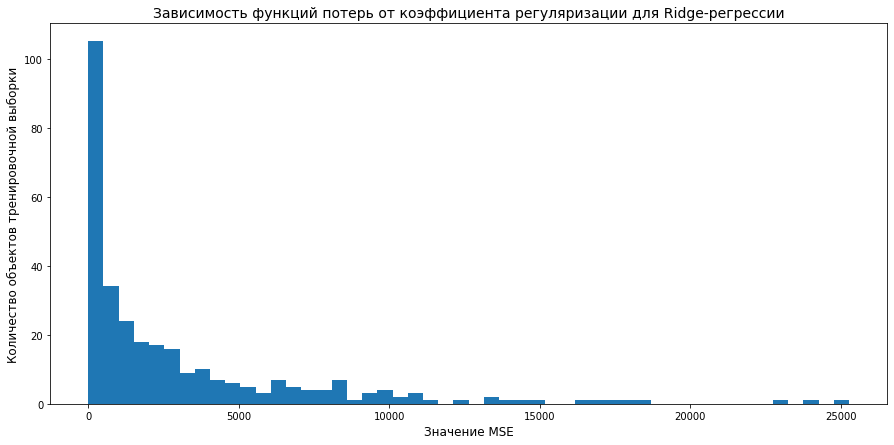

In [15]:
plt.figure(figsize=(15, 7))
plt.hist(mse_oof_list, density=False, bins=50)
plt.title('Зависимость функций потерь от коэффициента регуляризации для Ridge-регрессии', fontsize=14)
plt.xlabel('Значение MSE', fontsize=12)
plt.ylabel('Количество объектов тренировочной выборки', fontsize=12)
plt.show()

Видно, что объекты, на которых значение MSE превосходит 20000 - выбросы. Возможно, те объекты, на которых достигается ошибка в пределах $\in [15000, 20000]$ тоже являются выбросами. Проведем эксперименты:

In [16]:
quantile_list = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.98, 0.99, 0.995, 1]
mse_oof_array = np.array(mse_oof_list)

for q in quantile_list:
    print(f'Кол-во объектов, которые считаются выбросами при MSE > {np.quantile(mse_oof_array, q=q):.1f}:\
        {np.sum(mse_oof_array > np.quantile(mse_oof_array, q=q))}')

Кол-во объектов, которые считаются выбросами при MSE > 2051.1:        124
Кол-во объектов, которые считаются выбросами при MSE > 3112.1:        93
Кол-во объектов, которые считаются выбросами при MSE > 3951.6:        77
Кол-во объектов, которые считаются выбросами при MSE > 5121.9:        62
Кол-во объектов, которые считаются выбросами при MSE > 6809.0:        47
Кол-во объектов, которые считаются выбросами при MSE > 8340.5:        31
Кол-во объектов, которые считаются выбросами при MSE > 9224.9:        25
Кол-во объектов, которые считаются выбросами при MSE > 10377.0:        19
Кол-во объектов, которые считаются выбросами при MSE > 10958.3:        16
Кол-во объектов, которые считаются выбросами при MSE > 16869.3:        7
Кол-во объектов, которые считаются выбросами при MSE > 18336.6:        4
Кол-во объектов, которые считаются выбросами при MSE > 23684.0:        2
Кол-во объектов, которые считаются выбросами при MSE > 25282.0:        0


Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

Сравним качество на всех этих порогах для всех метрик, используя Ridge регрессию со стандартными параметрами.

In [17]:
ridge_model = Ridge()
rmse_list = []
mae_list = []
r2_list = []
for q in quantile_list:
    train_wout_anomaly_mask = mse_oof_array <= np.quantile(mse_oof_array, q=q)
    ridge_model.fit(X_train[train_wout_anomaly_mask], y_train[train_wout_anomaly_mask])
    preds = ridge_model.predict(X_test)
    rmse_list.append(np.sqrt(mean_squared_error(y_test, preds)))
    mae_list.append(mean_absolute_error(y_test, preds))
    r2_list.append(r2_score(y_test, preds))

In [18]:
print(f'Минимум RMSE = {np.min(rmse_list):.2f} достигается при отбрасывании {np.sum(mse_oof_array > np.quantile(mse_oof_array, q=quantile_list[np.argmin(rmse_list)]))} объектов')
print(f'Минимум MAE = {np.min(mae_list):.2f} достигается при отбрасывании {np.sum(mse_oof_array > np.quantile(mse_oof_array, q=quantile_list[np.argmin(mae_list)]))} объектов')
print(f'Максимум R^2 = {np.max(r2_list):.2f} достигается при отбрасывании {np.sum(mse_oof_array > np.quantile(mse_oof_array, q=quantile_list[np.argmax(r2_list)]))} объектов')

Минимум RMSE = 58.09 достигается при отбрасывании 16 объектов
Минимум MAE = 49.42 достигается при отбрасывании 19 объектов
Максимум R^2 = 0.36 достигается при отбрасывании 16 объектов


Напомним предыдущие результаты (для стандартных параметров модели):

RMSE score: 72.8037

MAE score: 59.9321

R2 score: 0.0019

**Ответ: таким образом, исключение выбросов из тренировочной выборки позволяет повысить качество Ridge регрессии. Это можно объяснить тем, что линейная модель сильно чувствительна к выбросам**

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [19]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [20]:
%%time
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train , y_train)

CPU times: user 9.76 s, sys: 27.9 ms, total: 9.79 s
Wall time: 8.64 s


/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score, precision_recall_curve

preds = linear_svc.predict(X_test)
print(roc_auc_score(y_test, preds))
print(average_precision_score(y_test, preds))


0.8462207775235677
0.7934328875797702


In [22]:
def plot_roc_curve(y_true, y_pred, title='', color='green'):
    plt.figure(figsize=(6,5))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, label=("ROC_AUC=%.2f" % roc_auc), linewidth=2,
    color=color)
    plt.title(title)
    plt.legend(loc="best")
    

def plot_pr_curve(y_true, y_pred, title='', color='green'):
    plt.figure(figsize=(6,5))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = average_precision_score(y_true, y_pred)
    plt.plot(recall, precision, label=("PR_AUC=%.2f" % pr_auc), linewidth=2,
    color=color)
    plt.title(title)
    plt.xlim(-0.05, 1.05)
    plt.legend(loc="best")
    

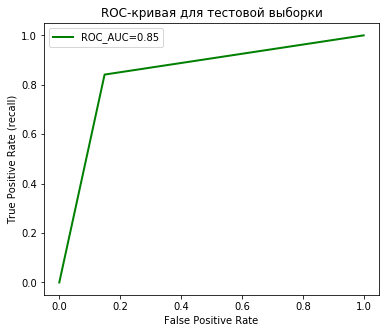

In [23]:
plot_roc_curve(y_test, preds, title='ROC-кривая для тестовой выборки')

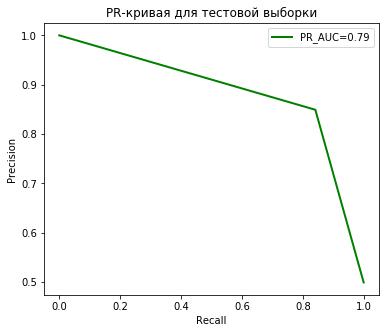

In [24]:
plot_pr_curve(y_test, preds, title='PR-кривая для тестовой выборки')

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой меткой (например, крестик), иначе теряется принадлежность к классу. 

In [25]:
from sklearn.svm import SVC

X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0,
    random_state=13)


linear_svc = SVC(kernel='linear')

In [26]:
%%time
linear_svc.fit(X, y)

CPU times: user 803 µs, sys: 0 ns, total: 803 µs
Wall time: 700 µs


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
X.shape, y.shape

((100, 2), (100,))

In [28]:
def plot_svc_decision_function(model, data, y_data):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    

    ax.contour(X, Y, P, colors='black',
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    ax.legend(['s'])
    
    
    plt.scatter(x=model.support_vectors_[:, 0],
                    y=model.support_vectors_[:, 1],
                    s=25,
                    marker="x",
                    color='yellow',
                    linewidth=2,
                    label='опорные вектора')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

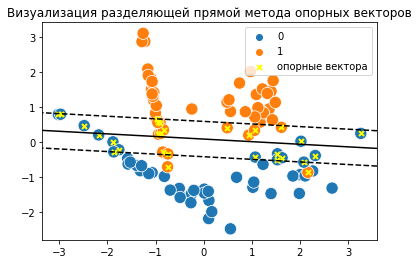

In [29]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y, s=150, label=None)
plot_svc_decision_function(linear_svc, data=X, y_data=y)

plt.legend()
plt.title('Визуализация разделяющей прямой метода опорных векторов')
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [30]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)]))
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [31]:
X, y = make_classification(
    n_samples=20000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

linear_svc = SVC(kernel='linear', probability=True)
logistic_regr = LogisticRegression()

In [33]:
%%time
linear_svc.fit(X_train, y_train)
preds_svc = linear_svc.predict_proba(X_test)

CPU times: user 1min 4s, sys: 172 ms, total: 1min 5s
Wall time: 1min 3s


In [34]:
%%time
logistic_regr.fit(X_train, y_train)
preds_logistic = logistic_regr.predict_proba(X_test)

CPU times: user 59.1 ms, sys: 14 µs, total: 59.1 ms
Wall time: 58.4 ms


/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


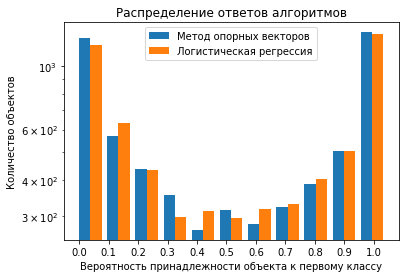

In [35]:
plt.hist(np.vstack([preds_svc[:, 1], preds_logistic[:, 1]]).reshape(-1, 2), 11)

plt.title('Распределение ответов алгоритмов')

plt.xticks([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] - np.arange(11) / 200 + 0.01,
           [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.legend(['Метод опорных векторов', 'Логистическая регрессия'])
plt.xlabel('Вероятность принадлежности объекта к первому классу')
plt.ylabel('Количество объектов')
plt.semilogy()

plt.show()

Из двух гистограмм, представленных выше видно. что

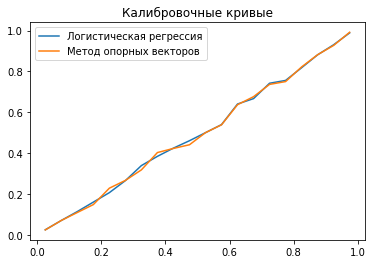

In [36]:
plot_calibration_curve(y_test, preds_logistic[:, 1])
plot_calibration_curve(y_test, preds_svc[:, 1])
plt.title('Калибровочные кривые')
plt.legend(['Логистическая регрессия', 'Метод опорных векторов'])
plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [37]:
from sklearn.calibration import CalibratedClassifierCV

calibr_classifier = CalibratedClassifierCV(linear_svc, cv=kfold)

In [38]:
calibr_classifier.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto_deprecated',
                                          kernel='linear', max_iter=-1,
                                          probability=True, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=KFold(n_splits=5, random_state=None, shuffle=False),
                       method='sigmoid')

In [39]:
preds_svc_calibrated = calibr_classifier.predict_proba(X_test)

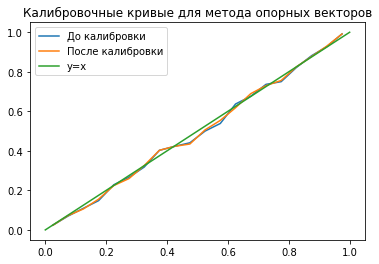

In [40]:
plot_calibration_curve(y_test, preds_svc[:, 1])
plot_calibration_curve(y_test, preds_svc_calibrated[:, 1])
plt.plot([0, 1], [0, 1], label='x = y')
plt.title('Калибровочные кривые для метода опорных векторов')
plt.legend(['До калибровки', 'После калибровки', 'y=x'])
plt.show()


Как видно из представленного графика - калибровочная кривая практически не изменилась. Это говорит о том, что SVM изначально выдал хорошие вероятности для данного теста.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [41]:
from sklearn.linear_model import LogisticRegression

linear_svc = SVC(kernel='linear', probability=True)
logistic_regr = LogisticRegression()

In [ ]:
%%time
linear_svc.fit(X_train, y_train)


In [ ]:
preds_svc = linear_svc.predict(X_test)

import scipy

plot_calibration_curve(y_test, scipy.special.softmax(linear_svc.decision_function(X_test)))
plt.plot([0, 1], [0, 1], label='x = y')


In [ ]:
scipy.special.softmax(linear_svc.decision_function(X_test))

In [ ]:
linear_svc.decision_function(X_test)

In [ ]:
preds_svc

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [ ]:
data = pd.read_csv('./data_logistic/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag')
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [ ]:
plot_roc_curve(y_test, preds[:, 1], title='ROC-кривая для логистической регрессии')
plt.plot([0, 1], [0, 1])
plt.legend(['Логистическая регрессия', 'Random-классификатор'])

In [ ]:
plot_pr_curve(y_test, preds[:, 1], title='PR-кривая для логистической регрессии')
plt.plot([0, 1], [0.5, 0.5])
plt.legend(['Логистическая регрессия', 'Random-классификатор'])
plt.ylim(-0.05, 1.1)

**Ответ: По данным кривым видно и значениям площадей видно, что модель имеет достаточно плохое качество.**

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

In [ ]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
import tqdm

l2_values_list = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 20, 50, 75, 100, 1000]
iter_amount = 100
fig = plt.figure(figsize=(20, 10))
ax_list = [fig.add_subplot(2, len(l2_values_list) / 2, i + 1) for i in range(len(l2_values_list))]

for i, l2_value in enumerate(l2_values_list):
    loss_values_valid = [] 
    loss_values_train = []
    log_reg = SGDClassifier(alpha=l2_value, loss='log', warm_start=True, n_jobs=-1)
    log_reg.partial_fit(X_train, y_train, classes=[0, 1])
    
    for j in range(iter_amount):
        log_reg.partial_fit(X_train, y_train)
        loss_values_valid.append(log_loss(y_test, log_reg.predict(X_test)))
        loss_values_train.append(log_loss(y_train, log_reg.predict(X_train)))
    if i % 4 == 0:
        ax_list[i].set_ylabel('Значение лосс-функции')
    if i >= (len(l2_values_list) - 4):
        ax_list[i].set_xlabel('Номер эпохи')
    ax_list[i].plot(loss_values_train, label='train_loss')
    ax_list[i].plot(loss_values_valid, label='test_loss')
    ax_list[i].set_title(f'Кривые обучения для alpha={l2_value}')
    ax_list[i].semilogy()
    

plt.tight_layout()
plt.legend()
plt.show()

По приведенным выше графикам видно, что при малых значениях коэффициента регуляризации кривые обучения ведут себя очень не стабильно: значение лосс функции колеблется в большом диапозоне.

Если же взять слишком большой коэффициент, то значение лосса перестает меняться совсем (при `alpha=1000`)

Видно, что при `alpha=1` - лосс на тренировочной выборке ниже, чем на тестовой, а при `alpha=10` ситуация меняется. Рассмотрим подробнее значения из диапазона: `[1, 10]`

In [ ]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
import tqdm

l2_values_list = list(range(1, 11))#[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 20, 50, 75, 100, 1000]
iter_amount = 100
fig = plt.figure(figsize=(20, 10))
ax_list = [fig.add_subplot(2, len(l2_values_list) / 2, i + 1) for i in range(len(l2_values_list))]

for i, l2_value in enumerate(l2_values_list):
    loss_values_valid = [] 
    loss_values_train = []
    log_reg = SGDClassifier(alpha=l2_value, loss='log', warm_start=True, n_jobs=-1)
    log_reg.partial_fit(X_train, y_train, classes=[0, 1])
    
    for j in range(iter_amount):
        log_reg.partial_fit(X_train, y_train)
        loss_values_valid.append(log_loss(y_test, log_reg.predict(X_test)))
        loss_values_train.append(log_loss(y_train, log_reg.predict(X_train)))
    if i % 4 == 0:
        ax_list[i].set_ylabel('Значение лосс-функции')
    if i >= (len(l2_values_list) - 4):
        ax_list[i].set_xlabel('Номер эпохи')
    ax_list[i].plot(loss_values_train, label='train_loss')
    ax_list[i].plot(loss_values_valid, label='test_loss')
    ax_list[i].set_title(f'Кривые обучения для alpha={l2_value}')
    ax_list[i].semilogy()
    

plt.tight_layout()
plt.legend()
plt.show()

Видно, что при возрастании `alpha` значение лосс-функции на тренировочной выборке становится больше, чем значение лосс-функции на тестовой выборке.

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
%%time
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)
log_reg = LogisticRegression(max_iter=1000, solver='sag', n_jobs=16)
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

Считаем, что категориальные признаки - те признаки, у которых есть приписка 'cat' на конце.

In [ ]:
def detect_cat_features(data):
    all_columns = data.columns
    return [cat_columns for cat_columns in all_columns if 'cat' == cat_columns[-3:]]


def one_hot_encoding(data):
    cat_columns = detect_cat_features(data)
    data_ohe = data.copy()
    for cat_column in cat_columns:
        unique_values = data_ohe[cat_column].unique()
        for unique_value in unique_values:
            data_ohe[cat_column + '_' + str(unique_value)] = data_ohe[cat_column] == unique_value
            data_ohe[cat_column + '_' + str(unique_value)] =\
                data_ohe[cat_column + '_' + str(unique_value)].map({True: 1, False: 0})
    return data_ohe.drop(columns=cat_columns)

In [ ]:
%%time
one_hot_encoding(data).head()

In [ ]:
data_ohe = one_hot_encoding(data)
X_train, X_test, y_train, y_test = train_test_split(data_ohe, target, test_size=0.5)

In [ ]:
%%time
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

Видно, что время, затрачиваемое на обучение увеличилось ~ в 2 раза, а ROC_AUC на 0.01.

Как можно было заметить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [ ]:
def counters_with_noise(data, y, noise_mean, noise_std):
    cat_columns = detect_cat_features(data)
    data_counters = data.copy()
    for cat_column in cat_columns:
        cross_tab_values = pd.crosstab(data_counters[cat_column],
                                       columns=y,
                                       colnames=['target'])
        new_column = data_counters[cat_column].copy().values
        for unique_value in data_counters[cat_column].unique():

            counter_value = cross_tab_values.loc[unique_value, 1] / cross_tab_values.loc[unique_value, :].sum()
            new_column = np.where(data_counters[cat_column] == unique_value,
                                  counter_value + np.random.normal(noise_mean, noise_std, new_column.shape[0]),
                                  new_column)
        data_counters[cat_column + '_counter_with_noise'] = new_column
    return data_counters.drop(columns=cat_columns)

Вычислим счетчики, добавив к ним шум из  $N\left(\mu, \sigma^2\right)$ (нормальное распределение с $\mu = 0, \sigma^2 = 1$ 

In [ ]:
%%time

data_counters = counters_with_noise(data, target, 0, 1)

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(data_counters, target, test_size=0.5)
log_reg = LogisticRegression(max_iter=1000, solver='sag', n_jobs=16)
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

Подберем значение стандартного отклонения для шума:

In [ ]:
import time
std_list = [0, 1e-5, 1e-3, 1e-2, 1e-1, 5e-1, 1, 100]

for std_val in std_list:
    start_time = time.time()
    data_counters = counters_with_noise(data, target, 0, std_val)
    X_train, X_test, y_train, y_test = train_test_split(data_counters, target, test_size=0.5)
    log_reg = LogisticRegression(max_iter=1000, solver='sag', n_jobs=16)
    log_reg.fit(X_train, y_train)
    preds = log_reg.predict_proba(X_test)
    
    print(f'std={std_val}, ROC_AUC={roc_auc_score(y_test, preds[:, 1])}, time={time.time() - start_time}')

**Ответ: Теперь обучение проходит быстрее медленнее всего в ~1.5 раза, чем на неизмененном датасете, при этом значение ROC_AUC снова превосходит изначальное значение, но немного хуже, чем при применении one_hot_encoding. Оптимальное значение стандартного отклонения у шума - 0.001, так как при больших значениях уже происходит потеря информации.**

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [ ]:
def counters_with_noise(data, y, noise_mean, noise_std):
    cat_columns = detect_cat_features(data)
    data_counters = data.copy()
    for cat_column in cat_columns:
        cross_tab_values = pd.crosstab(data_counters[cat_column],
                                       columns=y,
                                       colnames=['target'])
        new_column = data_counters[cat_column].copy().values
        for unique_value in data_counters[cat_column].unique():
            counter_value = cross_tab_values.loc[unique_value, 1] / cross_tab_values.loc[unique_value, :].sum()
            new_column = np.where(data_counters[cat_column] == unique_value,
                                  counter_value + np.random.normal(noise_mean, noise_std, new_column.shape[0]),
                                  new_column)
        data_counters[cat_column + '_counter_with_noise'] = new_column
    return data_counters.drop(columns=cat_columns)

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [ ]:
def counters_with_prior(data, y, C, prior):
    cat_columns = detect_cat_features(data)
    data_counters = data.copy()
    for cat_column in cat_columns:
        cross_tab_values = pd.crosstab(data_counters[cat_column],
                                       columns=y,
                                       colnames=['target'])
        new_column = data_counters[cat_column].copy().values
        for unique_value in data_counters[cat_column].unique():
            counter_value = (cross_tab_values.loc[unique_value, 1]  + C * prior) /\
                                (cross_tab_values.loc[unique_value, :].sum() + C)
            new_column = np.where(data_counters[cat_column] == unique_value,
                                  counter_value,
                                  new_column)
        data_counters[cat_column + '_' + '_counter_with_noise'] = new_column
    return data_counters.drop(columns=cat_columns)

In [ ]:
%%time
data_counters_prior = counters_with_prior(data, target, 1, np.mean(target))

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(data_counters_prior, target, test_size=0.5)
log_reg = LogisticRegression(max_iter=1000, solver='sag', n_jobs=4, )
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

Посмотрим на различные параметры $C$ и $prior$:

In [ ]:
from joblib import Parallel, delayed, parallel_backend

In [ ]:
C_list = [0, 0.1, 1, 100, np.mean(target)]
prior_list = [0, 0.1, 1, 100, np.mean(target)]



for C in C_list:
    for prior in prior_list:
        start_time = time.time()
        data_counters_prior = counters_with_prior(data, target, C, prior)


        X_train, X_test, y_train, y_test = train_test_split(data_counters_prior, target, test_size=0.5)
        log_reg = LogisticRegression(max_iter=1000, solver='sag', n_jobs=16)
        log_reg.fit(X_train, y_train)

        preds = log_reg.predict_proba(X_test)
        roc_auc_score(y_test, preds[:, 1])
        print(f'C={C}, prior={prior}, ROC_AUC={roc_auc_score(y_test, preds[:, 1])}, time={time.time() - start_time}')

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:** 

**Плюсы использования счетчиков по сравнению с one-hot-encoding:**
   1. Меньше затрат по памяти.
   2. Требуется меньше времени на обучение модели.
   
**Минусы использования счетчиков по сравнению с one-hot-encoding:**
   1. Более сложны в реализации.
   2. Нужно бороться с переобучением (например, с помощью заполнения счетчиков по фолдам). А при добавлении шума в счетчики - нужно еще найти оптимальные значения для шума, так как может произойти потеря информации.
   3. Качество модели немного хуже (возможно, это специфика данной задачи)

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('./data_logistic/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
%%time
data_ohe = one_hot_encoding(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ohe, target, test_size=0.2, random_state=124)

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
%%time
log_reg = LogisticRegression(max_iter=100, solver='sag', n_jobs=-1)
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

__(0.5 балла)__

In [ ]:
top_feat_idx = np.argsort(np.abs(log_reg.coef_)).reshape(-1)[-200:]

data_ohe_top_feat1 = data_ohe.iloc[:, top_feat_idx]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ohe_top_feat1, target, test_size=0.2, random_state=124)

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
%%time
log_reg = LogisticRegression(max_iter=100, solver='sag', n_jobs=-1)
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

**Ответ:** Качество повысилось совсем не значительно (на 0.0003). Это хорошо, так как нам удалось и улучшить модель, и снизить размерность признакового пространства, следовательно и время обучения финальной модели.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
%%time
from sklearn.preprocessing import Normalizer
X_train, X_test, y_train, y_test = train_test_split(data_ohe, target, test_size=0.2, random_state=124)

normalizer = Normalizer()

X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)


In [ ]:
%%time
log_reg = LogisticRegression(max_iter=100, solver='sag', n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test_scaled)
roc_auc_score(y_test, preds[:, 1])

Интересно, что нормировка ухудшила качество.

In [ ]:
top_feat_idx = np.argsort(np.abs(log_reg.coef_)).reshape(-1)[-200:]

data_ohe_top_feat2 = data_ohe.iloc[:, top_feat_idx]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ohe_top_feat2, target, test_size=0.2, random_state=124)

In [ ]:
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [ ]:
%%time
log_reg = LogisticRegression(max_iter=100, solver='sag', n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test_scaled)
roc_auc_score(y_test, preds[:, 1])

При это относительный прирост качества стал в два раза больше.

Ради интереса посмотрим, что будет, если обучить модель на тех признаках, которые были отобраны с нормировкой, но приведенных снова к изначальному масштабу

In [ ]:
%%time
log_reg = LogisticRegression(max_iter=100, solver='sag', n_jobs=-1)
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test_scaled)
roc_auc_score(y_test, preds[:, 1])

Это и ожидалось, но попытаться стоило..

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

__(0.5 балла)__

In [ ]:
def t_stat_values_calculation(data, target):
    t_stat_list = []
    n_plus = np.sum(target == 1)
    n_minus = np.sum(target == 0)
    
    for column in data.columns:
        mu_plus = np.mean(data[column][target == 1])
        mu_minus = np.mean(data[column][target == 0])
        sigma2_plus = np.var(data[column][target == 1])
        sigma2_minus = np.var(data[column][target == 0])
        numerator = np.abs(mu_plus + mu_minus)
        denominator = np.sqrt((n_plus * sigma2_plus + n_minus * sigma2_minus) / (n_plus + n_minus))
        t_stat_list.append(numerator / denominator)
    return t_stat_list

    

In [ ]:
%%time
t_stat_values = t_stat_values_calculation(data_ohe, target)

In [ ]:
top_features_idxs = np.argsort(t_stat_values)[-200:]

In [ ]:
data_ohe_filter = data_ohe.copy().iloc[:, top_features_idxs]
X_train, X_test, y_train, y_test = train_test_split(data_ohe_filter,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=124)

In [ ]:
%%time
log_reg = LogisticRegression(max_iter=100, solver='sag', n_jobs=-1)
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
import tqdm
import random


class FeatureEliminator:
    def __init__(self, model, data, target):
        self.features_list = list(data.columns)
        self.data = data.copy()
        self.target = target
        self.model = model
        self.usefull_features = self.features_list
        self.seed = 124
        self.test_size = 0.2
        self.best_roc_auc = 0
    
    def feature_elimination(self, min_features=200):
        ## Проверим качество со всеми признаками и возьмем его за лучшее
        data_tmp = self.data.copy()
        X_train, X_test, y_train, y_test = train_test_split(data_tmp,
                                                                self.target,
                                                                test_size=self.test_size,
                                                                random_state=self.seed,
                                                                shuffle=False)
        self.model.fit(X_train, y_train)
        probs = self.model.predict_proba(X_test)
        self.best_roc_auc = roc_auc_score(y_test, probs[:, 1])
        
        random.shuffle(self.features_list)
        for feature in tqdm.tqdm_notebook(self.features_list):
            data_wout_1_feature = data_tmp.drop(columns=feature)
            X_train, X_test, y_train, y_test = train_test_split(data_wout_1_feature,
                                                                self.target,
                                                                test_size=self.test_size,
                                                                random_state=self.seed,
                                                                shuffle=False)
            self.model.fit(X_train, y_train)
            probs = self.model.predict_proba(X_test)
            roc_auc_curr = roc_auc_score(y_test, probs[:, 1])
            if roc_auc_curr >= self.best_roc_auc:
                data_tmp = data_wout_1_feature.copy()
                self.best_roc_auc = roc_auc_curr
                self.usefull_features.remove(feature)
            if min_features >= data_tmp.shape[1]:
                break
            print(f'ROC_AUC_curr={roc_auc_curr}, ROC_AUC_best={self.best_roc_auc}, features amount={data_tmp.shape[1]}',)
        return self.usefull_features
            
            
            

In [ ]:
# some resampling
samples_amount = 10000

np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], samples_amount, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], samples_amount, replace=True)

data = pd.concat((data_ohe.iloc[mask_plus], data_ohe.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
feat_elim = FeatureEliminator(log_reg, X_train, y_train)

In [ ]:
%%time
feat_elim.feature_elimination(min_features=200)

In [ ]:
usefull_features = feat_elim.usefull_features

In [ ]:
X_train_usefull_features = X_train.loc[:, usefull_features]
X_test_usefull_features = X_test.loc[:, usefull_features]

In [ ]:
%%time
log_reg.fit(X_train, y_train)

In [ ]:
preds = log_reg.predict_proba(X_test)
roc_auc_score(y_test, preds[:, 1])

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: Всего было рассмотрено три метода:**

    1. Встроенный метод.
    2. Метод фильтрации.
    3. Метод обертки.
    
Рассмотрим плюсы и минусы каждого из них:

    1. Встроенный метод
        Плюсы:
            а)  Качество лучше, чем без применение данного метода отбора признаков (в условиях данной задачи).
            б) Относительно малое время, нужное на выбор признаков.
        Минусы:
            а) Для объективной оценки качества признака нужно производить дополнительные операции (нормировка).
    2. Метод фильтрации
        Плюсы:
            а) Очень быстрый отбор признаков.
            б) Качество лучше, чем без применение данного метода отбора признаков (в условиях данной задачи)
        Минусы:
            а) Непонятно, как работать с категориальными признаками.
    3. Метод обертки
        Плюсы:
            а) Лучшее качество из всех методов (в условиях данной задачи)
        Минусы:
            а) Очень долгое время отбора признаков.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самый задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv('./data_logistic/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
sum(target == 1) / target.shape[0]

 Доля положительных примеров составляет ~4%. Это неудивительно, так как происшествия, из-за которых обращаются в страховую компанию, встречаются не так часто

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
%%time
data_ohe = one_hot_encoding(data)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data_ohe, target, test_size=0.2, random_state=124)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
probs = log_reg.predict_proba(X_test)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
roc_auc_score(y_test, probs[:, 1])

Качество получилось достаточно плохим. Это может быть связано с большим дисбалансом в классах. Возможно, нужно было использовать стратифицированное разделение на тренировочную и тестовую выборки.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

In [ ]:
# with plt.xkcd():
plot_pr_curve(y_test, probs[:, 1], 'PR-кривая для логистической регрессии')

Из данной кривой видно, что качество классификации плохое. Этот эффект возникает как раз из-за дизбаланса классов.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [ ]:
probs

In [ ]:
from sklearn.metrics import precision_score

threshold_arr = np.linspace(0, 1, 1000)
for threshold in tqdm.tqdm_notebook(threshold_arr):
    score = precision_score(y_test, probs[:, 1] > threshold)
    if score >= 0.95:
        print(f'Значение precision: {score}, порог вероятности: {threshold}')
        break

 Возьмем за порог значение - 0.4734 и посчитаем precision (снова), recall:

In [ ]:
from sklearn.metrics import recall_score

print(f'Precision={precision_score(y_test, probs[:, 1] > 0.4734)},\
    Recall={recall_score(y_test, probs[:, 1] > 0.4734)}')

Мы будем отказывать 99,95% (процентам) потенциальных клиентов.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

In [ ]:
money_for_pos = -100000
money_for_neg = 5000

threshold_arr = np.linspace(0, 1, 1000)
for threshold in threshold_arr:
    predictions = probs[:, 1] > threshold
    score = precision_score(y_test, predictions)
    print(np.sum(y_test[predictions == 0] == 0) * money_for_neg +  
          np.sum(y_test[predictions == 0] == 1) * money_for_pos)
    print(f'Значение precision: {score}, порог вероятности: {threshold}')

А на каком значение порога это разница максимальна? Скольким клиентам мы отказали в обслуживании?

??

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборки и оставшуюся часть для тестирования.

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборкеболее 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

Расширенная информация о формате данных в VW:

[Label] [Importance] [Tag]|Namespace Features |Namespace Features ... |Namespace Features


Namespace=String[:Value]


Features=(String[:Value] )


где [] обозначает необязательные элементы, а (...)* означает повтор неопределенное число раз.


- Label является числом, "правильным" ответом. В случае классификации обычно принимает значение 1/-1, а в случае регрессии некоторое вещественное число
- Importance является числом и отвечает за вес примера при обучении. Это позволяет бороться с проблемой несбалансированных данных, изученной нами ранее
- Tag является некоторой строкой без пробелов и отвечает за некоторое "название" примера, которое сохраняется при предсказании ответа. Для того, чтобы отделить Tag от Importance лучше начинать Tag с символа '.
- Namespace служит для создания отдельных пространств признаков. В аргументах Namespace именуются по первой букве, это нужно учитывать при выборе их названий
- Features являются непосредственно признаками объекта внутри Namespace. Признаки по умолчанию имеют вес 1.0, но его можно переопределить, к примеру feature:0.1.


In [ ]:
!vw house_dataset

Будем использовать id из признаков, как Tag, а 1.0, как Importance.

In [ ]:
import tqdm


def convert_line_to_vw_format(line, features_names, valid=False):
    ##Уберем id в Tag, так как он не несет никакой полезной информации для модели
    features_list = line.split(',')
    features_names = features_names[2:]
    id_feature = features_list.pop(0)
    target = 1 if features_list.pop(0) == '1' else -1
    if valid:
        vw_line = '\'' + ' |' #str(id_feature) + ' |'
    else:
        vw_line = str(target) + ' 1.0 ' + '\'' + str(id_feature) + ' |'
        
    for feature in features_list:
        vw_line += ' ' + str(feature)
    return vw_line
    



def convert_csv_to_vw_format(path_to_input_file,
                             path_to_output_file_train,
                             path_to_output_file_valid,
                             lines_amount_train=5,
                             lines_amount_valid=5):
    with open(path_to_input_file, 'r') as input_file:
            i = 0
            feature_names = []
            with open(path_to_output_file_train, 'w+') as output_file_train:
                for line in tqdm.tqdm_notebook(input_file, total=lines_amount_train):
                    if i == 0:
                        feature_names = line.split(',')
                        print(feature_names)
                    output_file_train.write(convert_line_to_vw_format(line, feature_names))
                    i += 1
                    if i >= lines_amount_train:
                        break
            i = 0
            with open(path_to_output_file_valid, 'w+') as output_file_valid:
                for line in tqdm.tqdm_notebook(input_file, total=lines_amount_valid):
                    output_file_valid.write(convert_line_to_vw_format(line, feature_names, valid=True))
                    i += 1
                    if i >= lines_amount_valid:
                        break


def target_value_to_file(path_to_input_file, path_to_output_file):
    with open(path_to_input_file, 'r') as input_file:
        with open(path_to_output_file, 'w') as output_file:
            for line in tqdm.tqdm_notebook(input_file):
                target = 1 if line.split(',')[1] == '1' else -1
                output_file.write(str(target) + '\n')
            
    

In [ ]:
convert_csv_to_vw_format('./data_vw/train.csv',
                         './data_vw/train.vw',
                         './data_vw/valid.vw',
                         lines_amount_train=3e7,
                         lines_amount_valid=1e7)

Запишем все таргеты трейна и валидационной выборки в файл для удобства.

In [ ]:
# target_value_to_file('./data_vw/train.csv', './data_vw/train_targets')

In [ ]:
!vw -d ./data_vw/train.vw --loss_function=logistic --link=logistic -f ./data_vw/model.vw

In [ ]:
!vw -i ./data_vw/model.vw -t -d ./data_vw/valid.vw \
-p ./data_vw/valid_predictions

Пока интересных особенностей VW не нашел, зато узнал, что с помощью matplotlib можно рисовать "мультяшные" графики))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


with open('./data_vw/valid_predictions') as pred_file:
    test_prediction = [float(label) 
                             for label in pred_file.readlines()]
    
with open('./data_vw/train_targets') as pred_file:
    test_labels = [float(label) 
                             for label in pred_file.readlines()]

auc = roc_auc_score(test_labels[30000000:40000000], test_prediction)
a_roc_curve = roc_curve(test_labels[30000000:40000000], test_prediction)

with plt.xkcd():
    plt.plot(a_roc_curve[0], a_roc_curve[1]);
    plt.plot([0,1], [0,1])
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.title('test AUC = %f' % (auc))
    plt.axis([-0.05,1.05,-0.05,1.05]);

Бэйзлайн есть. Ну что же, пора изучать библиотеку подробнее.
- Параметр **--passes N** отвечает за количество эпох (сколько раз алгоритм прошел всю тренировочную выборку)
Для реализации этого подхода пришлось изучить еще один параметр:
- **--cache_file** - файл, в котором будет храниться информация о модели при обучении

Попробуем пройти выборку 5 раз:

In [ ]:
%%time
!vw -d ./data_vw/train.vw --loss_function=logistic --link=logistic --passes 2 --cache_file\
./data_vw/cache_for_passes -f ./data_vw/model.vw

In [ ]:
!vw -i ./data_vw/model.vw -t --cache_file\
./data_vw/cache_for_passes_valid -d ./data_vw/valid.vw -p ./data_vw/valid_predictions

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

with open('./data_vw/valid_predictions') as pred_file:
    test_prediction = [float(label) 
                             for label in pred_file.readlines()]
    
# with open('./data_vw/train_targets') as pred_file:
#     test_labels = [float(label) 
#                              for label in pred_file.readlines()]

auc = roc_auc_score(test_labels[30000000:40000000], test_prediction)
a_roc_curve = roc_curve(test_labels[30000000:40000000], test_prediction)

with plt.xkcd():
    plt.plot(a_roc_curve[0], a_roc_curve[1]);
    plt.plot([0,1], [0,1])
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.title('test AUC = %f' % (auc))
    plt.axis([-0.05,1.05,-0.05,1.05]);


Качество стало хуже :(

In [ ]:
def plot_roc_auc_vw(path_to_data):
    with open(path_to_data) as pred_file:
        test_prediction = [float(label) 
                                 for label in pred_file.readlines()]
    
    # with open('./data_vw/train_targets') as pred_file:
    #     test_labels = [float(label) 
    #                              for label in pred_file.readlines()]

    auc = roc_auc_score(test_labels[30000000:40000000], test_prediction)
    a_roc_curve = roc_curve(test_labels[30000000:40000000], test_prediction)

    with plt.xkcd():
        plt.plot(a_roc_curve[0], a_roc_curve[1]);
        plt.plot([0,1], [0,1])
        plt.xlabel('FPR'); plt.ylabel('TPR')
        plt.title('test AUC = %f' % (auc))
        plt.axis([-0.05,1.05,-0.05,1.05]);

In [ ]:
plot_roc_auc_vw('./data_vw/valid_predictions')

In [ ]:
%%time
!vw -d ./data_vw/train.vw --nn=100 --loss_function=logistic --link=logistic --passes 2 --cache_file\
./data_vw/cache_for_passes --decay_learning_rate=.95 -f ./data_vw/model.vw

In [ ]:
!vw -i ./data_vw/model.vw -t --cache_file\
./data_vw/cache_for_passes_valid -d ./data_vw/valid.vw -p ./data_vw/valid_predictions

In [ ]:
plot_roc_auc_vw('./data_vw/valid_predictions')

Почти... Сохраним эту модель и её предсказания для стэкинга/блендинга в дальнейшем. 

In [ ]:
!vw -d ./data_vw/train.vw --learning_rate=0.1 --loss_function=logistic --link=logistic -f ./data_vw/model.vw

In [ ]:
!vw -i ./data_vw/model.vw -t -d ./data_vw/valid.vw \
-p ./data_vw/valid_predictions

In [ ]:
plot_roc_auc_vw('./data_vw/valid_predictions')

И никакие нейронки не нужны.. Ключ к успеху - правильный learning_rate :))

Попробуем еще повысить качетсво с помощью **--passes, --decay_learning_rate**

In [ ]:
!vw -d ./data_vw/train.vw --learning_rate=0.07 --link=logistic --passes 5 --cache_file\
./data_vw/cache_for_passes --decay_learning_rate=.5 --loss_function=logistic --link=logistic -f ./data_vw/model.vw

In [ ]:
!vw -i ./data_vw/model.vw -t -d ./data_vw/valid.vw \
-p ./data_vw/valid_predictions

In [ ]:
plot_roc_auc_vw('./data_vw/valid_predictions')

In [ ]:
!vw -d ./data_vw/train.vw --learning_rate=0.01 --link=logistic --passes 50 --cache_file\
./data_vw/cache_for_passes --decay_learning_rate=.35 --loss_function=logistic --link=logistic -f ./data_vw/model.vw

In [ ]:
!vw -i ./data_vw/model.vw -t -d ./data_vw/valid.vw \
-p ./data_vw/valid_predictions

In [ ]:
plot_roc_auc_vw('./data_vw/valid_predictions')